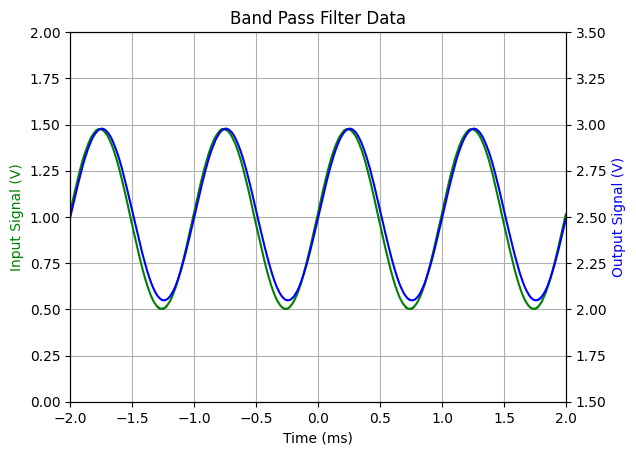

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("scope_0.csv", skiprows=1)
t = data["second"].to_numpy()
v_in = data["Volt.1"].to_numpy()
v_out = data["Volt"].to_numpy()

# Use AC RMS values for gain calculation
v_in_dc = np.mean(v_in)
v_in_ac_rms = np.sqrt(np.mean((v_in - v_in_dc)**2))
v_in_pp = np.max(v_in) - np.min(v_in)
v_out_dc = np.mean(v_out)
v_out_ac_rms = np.sqrt(np.mean((v_out - v_out_dc)**2))
v_out_pp = np.max(v_out) - np.min(v_out)
gain = v_out_ac_rms / v_in_ac_rms
gain_db = 20 * np.log10(gain)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(t * 10**3, v_in, 'g-')
ax2.plot(t * 10**3, v_out, 'b-')

ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Input Signal (V)", color='g')
ax1.set_xlim(-2, 2)
ax1.set_ylim(0, 2)
ax2.set_ylabel("Output Signal (V)", color='b')
ax2.set_ylim(1.5, 3.5)
ax1.grid(which="both", axis="both")
plt.title("Band Pass Filter Data")
plt.show()

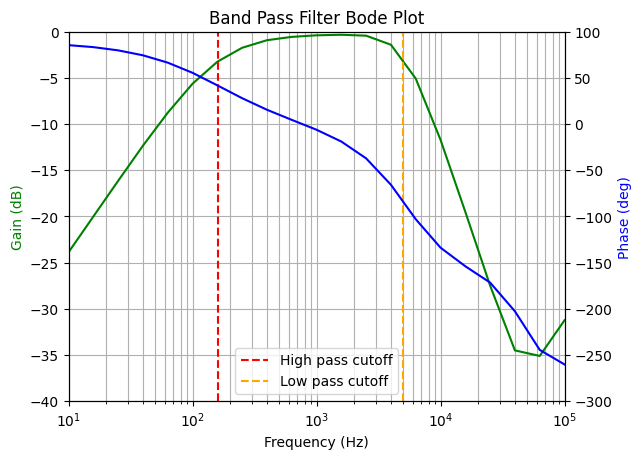

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("freq_resp.csv")
f = data[" Frequency (Hz)"].to_numpy()
gain = data[" Gain (dB)"].to_numpy()
phase = data[" Phase (deg)"].to_numpy()
phase = np.remainder(phase + 270, 360) - 270  # Wrap phase to [-270, 90]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(f, gain, 'g-')
ax2.plot(f, phase, 'b-')

ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Gain (dB)", color='g')
ax1.set_xlim(10, 100000)
ax1.set_xscale("log")
ax1.set_ylim(-40, 0)
ax2.set_ylabel("Phase (deg)", color='b')
ax2.set_ylim(-300, 100)
ax1.grid(which="both", axis="both")
ax1.axvline(160, color="r", linestyle="--", label="High pass cutoff")
ax1.axvline(5000, color="orange", linestyle="--", label="Low pass cutoff")
ax1.legend()
plt.title("Band Pass Filter Bode Plot")
plt.show()